In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
wage_data = pd.read_csv('usa_00005.csv.gz', compression = "gzip")
wage_data

,SEX,AGE,RACE,RACED,HCOVANY,EDUC,EDUCD,DEGFIELD,DEGFIELDD,EMPSTAT,EMPSTATD,IND,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,2,85,8,801,2,7,71,0,0,3,30,0,0,0,0,0,0
1,1,51,1,100,2,6,64,0,0,3,30,5391,12500,0,0,0,0
2,2,36,2,200,2,2,26,0,0,3,30,1180,16400,0,0,0,0
3,1,74,2,200,2,0,2,0,0,3,30,0,0,0,0,0,0
4,1,49,1,100,1,7,71,0,0,3,30,770,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,1,33,1,100,2,10,101,11,1199,1,10,7860,52000,0,0,56,10
3373374,2,27,1,100,2,10,101,23,2305,1,10,7860,43000,0,0,56,45
3373375,1,1,1,100,2,0,1,0,0,0,0,0,999999,99999,999999,0,0
3373376,1,66,1,100,2,6,63,0,0,1,10,580,162000,0,0,56,10


In [22]:
drop_cols = ['RACED','EDUCD','DEGFIELDD','IND']
wage_data = wage_data.drop(columns=drop_cols)
wage_data

,SEX,AGE,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,EMPSTATD,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,2,85,8,2,7,0,3,30,0,0,0,0,0
1,1,51,1,2,6,0,3,30,12500,0,0,0,0
2,2,36,2,2,2,0,3,30,16400,0,0,0,0
3,1,74,2,2,0,0,3,30,0,0,0,0,0
4,1,49,1,1,7,0,3,30,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373373,1,33,1,2,10,11,1,10,52000,0,0,56,10
3373374,2,27,1,2,10,23,1,10,43000,0,0,56,45
3373375,1,1,1,2,0,0,0,0,999999,99999,999999,0,0
3373376,1,66,1,2,6,0,1,10,162000,0,0,56,10


In [3]:
# dropping raced, educd, degfieldd

"""
Race Codes: 

1	White	
2	Black/African American	
3	American Indian or Alaska Native	
4	Chinese	
5	Japanese	
6	Other Asian or Pacific Islander	
7	Other race, nec	
8	Two major races	
9	Three or more major races
"""

"""
HCOVANY Codes: 

1	No health insurance coverage	
2	With health insurance coverage
"""

"""
EDUC codes:

00	N/A or no schooling	X
01	Nursery school to grade 4	X
02	Grade 5, 6, 7, or 8	X
03	Grade 9	X
04	Grade 10	X
05	Grade 11	X
06	Grade 12	X
07	1 year of college	X
08	2 years of college	X
09	3 years of college	·
10	4 years of college	X
11	5+ years of college	X
99	Missing
"""

"""
DEGFIELD Codes: 

00	N/A	X
11	Agriculture	X
13	Environment and Natural Resources	X
14	Architecture	X
15	Area, Ethnic, and Civilization Studies	X
19	Communications	X
20	Communication Technologies	X
21	Computer and Information Sciences	X
22	Cosmetology Services and Culinary Arts	X
23	Education Administration and Teaching	X
24	Engineering	X
25	Engineering Technologies	X
26	Linguistics and Foreign Languages	X
29	Family and Consumer Sciences	X
32	Law	X
33	English Language, Literature, and Composition	X
34	Liberal Arts and Humanities	X
35	Library Science	X
36	Biology and Life Sciences	X
37	Mathematics and Statistics	X
38	Military Technologies	X
40	Interdisciplinary and Multi-Disciplinary Studies (General)	X
41	Physical Fitness, Parks, Recreation, and Leisure	X
48	Philosophy and Religious Studies	X
49	Theology and Religious Vocations	X
50	Physical Sciences	X
51	Nuclear, Industrial Radiology, and Biological Technologies	X
52	Psychology	X
53	Criminal Justice and Fire Protection	X
54	Public Affairs, Policy, and Social Work	X
55	Social Sciences	X
56	Construction Services	X
57	Electrical and Mechanic Repairs and Technologies	X
58	Precision Production and Industrial Arts	·
59	Transportation Sciences and Technologies	X
60	Fine Arts	X
61	Medical and Health Sciences and Services	X
62	Business	X
64	History
"""
# Need codes for ind/incwage

"""
PWSTATE2:

00	N/A	X
01	Alabama	X
02	Alaska	X
04	Arizona	X
05	Arkansas	X
06	California	X
08	Colorado	X
09	Connecticut	X
10	Delaware	X
11	District of Columbia	X
12	Florida	X
13	Georgia	X
15	Hawaii	X
16	Idaho	X
17	Illinois	X
18	Indiana	X
19	Iowa	X
20	Kansas	X
21	Kentucky	X
22	Louisiana	X
23	Maine	X
24	Maryland	X
25	Massachusetts	X
26	Michigan	X
27	Minnesota	X
28	Mississippi	X
29	Missouri	X
30	Montana	X
31	Nebraska	X
32	Nevada	X
33	New Hampshire	X
34	New Jersey	X
35	New Mexico	X
36	New York	X
37	North Carolina	X
38	North Dakota	X
39	Ohio	X
40	Oklahoma	X
41	Oregon	X
42	Pennsylvania	X
44	Rhode Island	X
45	South Carolina	X
46	South Dakota	X
47	Tennessee	X
48	Texas	X
49	Utah	X
50	Vermont	X
51	Virginia	X
53	Washington	X
54	West Virginia	X
55	Wisconsin	X
56	Wyoming	X
State group codes (UR samples)	
61	Maine-New Hampshire-Vermont	·
62	Massachusetts-Rhode Island	·
63	Minnesota-Iowa-Missouri-Kansas-Nebraska-S.Dakota-N.Dakota	·
64	Maryland-Delaware	·
65	Montana-Idaho-Wyoming	·
66	Utah-Nevada	·
67	Arizona-New Mexico	·
68	Alaska-Hawaii	·
72	Puerto Rico	X
73	U.S. outlying area	·
74	United States (1980 Puerto Rico samples)	·
80	Abroad	·
81	Europe	X
82	Eastern Asia	·
83	Other Asia, n.s. (2003-2005 ACS); South Central, South East, and Western Asia (2000-2002 ACS)	X
84	Mexico	X
85	Other Americas	X
86	Other, n.e.c.	X
87	Iraq	·
88	Canada	·
90	Confidential	·
99	Not reported
"""

'\nPWSTATE2:\n\n00\tN/A\tX\n01\tAlabama\tX\n02\tAlaska\tX\n04\tArizona\tX\n05\tArkansas\tX\n06\tCalifornia\tX\n08\tColorado\tX\n09\tConnecticut\tX\n10\tDelaware\tX\n11\tDistrict of Columbia\tX\n12\tFlorida\tX\n13\tGeorgia\tX\n15\tHawaii\tX\n16\tIdaho\tX\n17\tIllinois\tX\n18\tIndiana\tX\n19\tIowa\tX\n20\tKansas\tX\n21\tKentucky\tX\n22\tLouisiana\tX\n23\tMaine\tX\n24\tMaryland\tX\n25\tMassachusetts\tX\n26\tMichigan\tX\n27\tMinnesota\tX\n28\tMississippi\tX\n29\tMissouri\tX\n30\tMontana\tX\n31\tNebraska\tX\n32\tNevada\tX\n33\tNew Hampshire\tX\n34\tNew Jersey\tX\n35\tNew Mexico\tX\n36\tNew York\tX\n37\tNorth Carolina\tX\n38\tNorth Dakota\tX\n39\tOhio\tX\n40\tOklahoma\tX\n41\tOregon\tX\n42\tPennsylvania\tX\n44\tRhode Island\tX\n45\tSouth Carolina\tX\n46\tSouth Dakota\tX\n47\tTennessee\tX\n48\tTexas\tX\n49\tUtah\tX\n50\tVermont\tX\n51\tVirginia\tX\n53\tWashington\tX\n54\tWest Virginia\tX\n55\tWisconsin\tX\n56\tWyoming\tX\nState group codes (UR samples)\t\n61\tMaine-New Hampshire-Vermont\t·\n6

In [24]:
wage_data['INCWAGE']

0               0
1           12500
2           16400
3               0
4               0
            ...  
3373373     52000
3373374     43000
3373375    999999
3373376    162000
3373377     25000
Name: INCWAGE, Length: 3373378, dtype: int64

In [26]:
# Remove rows where INCWAGE is 999999 (N/A)
wage_data = wage_data[wage_data['INCWAGE'] != 999999]
wage_data

,SEX,AGE,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,EMPSTATD,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
0,2,85,8,2,7,0,3,30,0,0,0,0,0
1,1,51,1,2,6,0,3,30,12500,0,0,0,0
2,2,36,2,2,2,0,3,30,16400,0,0,0,0
3,1,74,2,2,0,0,3,30,0,0,0,0,0
4,1,49,1,1,7,0,3,30,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3373372,1,55,1,2,6,0,1,10,21800,0,0,56,13
3373373,1,33,1,2,10,11,1,10,52000,0,0,56,10
3373374,2,27,1,2,10,23,1,10,43000,0,0,56,45
3373376,1,66,1,2,6,0,1,10,162000,0,0,56,10


In [63]:
wage_data['INCWAGE'].max()

791000

In [33]:
wage_data.describe()

,SEX,AGE,RACE,HCOVANY,EDUC,DEGFIELD,EMPSTAT,EMPSTATD,INCWAGE,INCWELFR,INCINVST,PWSTATE2,TRANTIME
count,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06,2.809390e+06
mean,1.513144e+00,4.975876e+01,2.414484e+00,1.921980e+00,7.418151e+00,1.414194e+01,1.855315e+00,1.859637e+01,3.521161e+04,4.859950e+01,3.015792e+03,1.530945e+01,1.224302e+01
std,4.998273e-01,1.974501e+01,2.509463e+00,2.682033e-01,2.467408e+00,2.257371e+01,9.777120e-01,9.745705e+00,6.538914e+04,6.935578e+02,2.496205e+04,1.831165e+01,2.030420e+01
min,1.000000e+00,1.600000e+01,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-3.000000e+03,0.000000e+00,0.000000e+00
25%,1.000000e+00,3.300000e+01,1.000000e+00,2.000000e+00,6.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,5.000000e+01,1.000000e+00,2.000000e+00,7.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,9.000000e+03,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00
75%,2.000000e+00,6.600000e+01,2.000000e+00,2.000000e+00,1.000000e+01,2.400000e+01,3.000000e+00,3.000000e+01,5.000000e+04,0.000000e+00,0.000000e+00,3.200000e+01,2.000000e+01
max,2.000000e+00,9.700000e+01,9.000000e+00,2.000000e+00,1.100000e+01,6.400000e+01,3.000000e+00,3.000000e+01,7.910000e+05,3.000000e+04,4.680000e+05,8.600000e+01,1.580000e+02


In [43]:
(wage_data['INCWAGE'] == 0).sum()

1179302

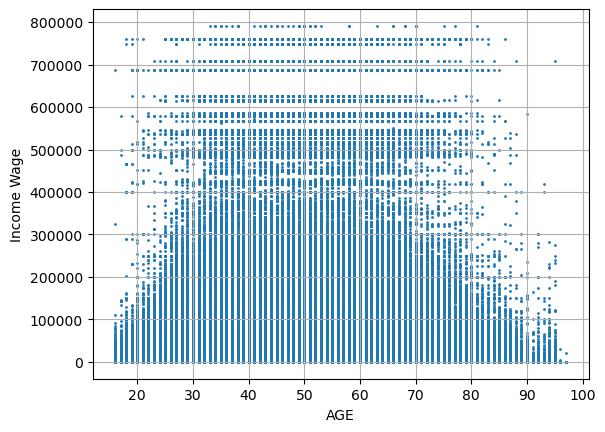

In [61]:
plt.scatter(wage_data['AGE'], wage_data['INCWAGE'], s=1)
plt.xlabel('AGE')
plt.ylabel('Income Wage')
plt.grid(True)
plt.show()

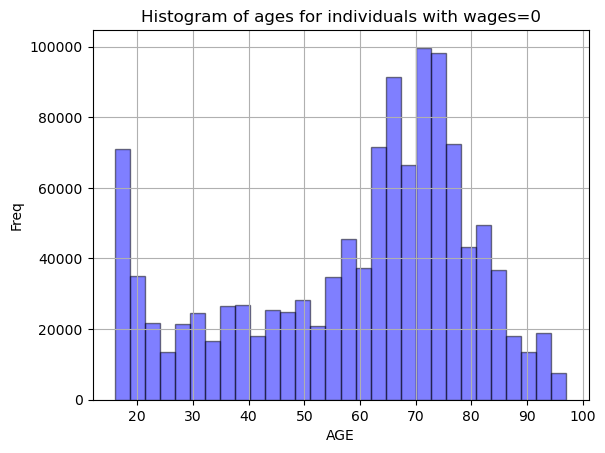

In [65]:
wage_zero_data = wage_data[wage_data['INCWAGE']==0]

plt.hist(wage_zero_data['AGE'], bins=30, color='blue', edgecolor ='k', alpha=0.5)
plt.title('Histogram of ages for individuals with wages=0')
plt.xlabel('AGE')
plt.ylabel('Freq')
plt.grid(True)
plt.show()